In [1]:
# imports
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
import numpy as np
import spacy
import os
import pandas as pd
import collections
%matplotlib inline

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
### Creating DataFrame

idir = "/home/akhilesh/civicdatalab/samantar_parsers/data/txts/"
df = pd.DataFrame()
all_data = []
for filename in os.listdir(idir):
    if filename.endswith('.txt'):
        with open(idir + filename, 'r') as f:
            data = f.readlines()
        stripped_data = list(map(lambda x: x.strip(), data))
        clean_data = ' '.join(stripped_data)
        corr = (filename.split(".")[0], clean_data)
        all_data.append(corr)

df = pd.DataFrame(all_data)
df.columns = ['year', 'content']

In [4]:
df['tokenised'] = df.content.apply(lambda x: [x.text for x in nlp.tokenizer(x)])

In [5]:
from measures.probmodel_based import orlov_z

In [6]:
measures = dict(
    orlov_z=orlov_z
)

In [7]:
window_size = 100

In [8]:
def get_freq_spectrum(tokens: List[str]) -> Dict[int, int]:
    freq_list = collections.Counter(tokens)
    freq_spectrum = dict(collections.Counter(freq_list.values()))
    return freq_spectrum

In [9]:
def get_measure(tokens: List[str], measure: str) -> np.float64:
    func = measures[measure]
    total_measure = []
#     freq_spectrum = get_freq_spectrum(tokens)
#     vocab_size = len(set(tokens))
#     total_measure.append(func(vocab_size, freq_spectrum))
    for i in range(int(len(tokens) / window_size)):
        chunk = tokens[i * window_size : (i * window_size) + window_size]
        freq_spectrum = get_freq_spectrum(tokens)
        vocab_size = len(set(tokens))
        txt_len = len(tokens)
        result = func(txt_len, vocab_size, freq_spectrum)
        total_measure.append(result)
    return np.mean(total_measure)

In [10]:
df['orlov_z'] = df['tokenised'].apply(lambda x: get_measure(x, 'orlov_z'))

/home/akhilesh/venv/p3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [11]:
new_df = df.copy()

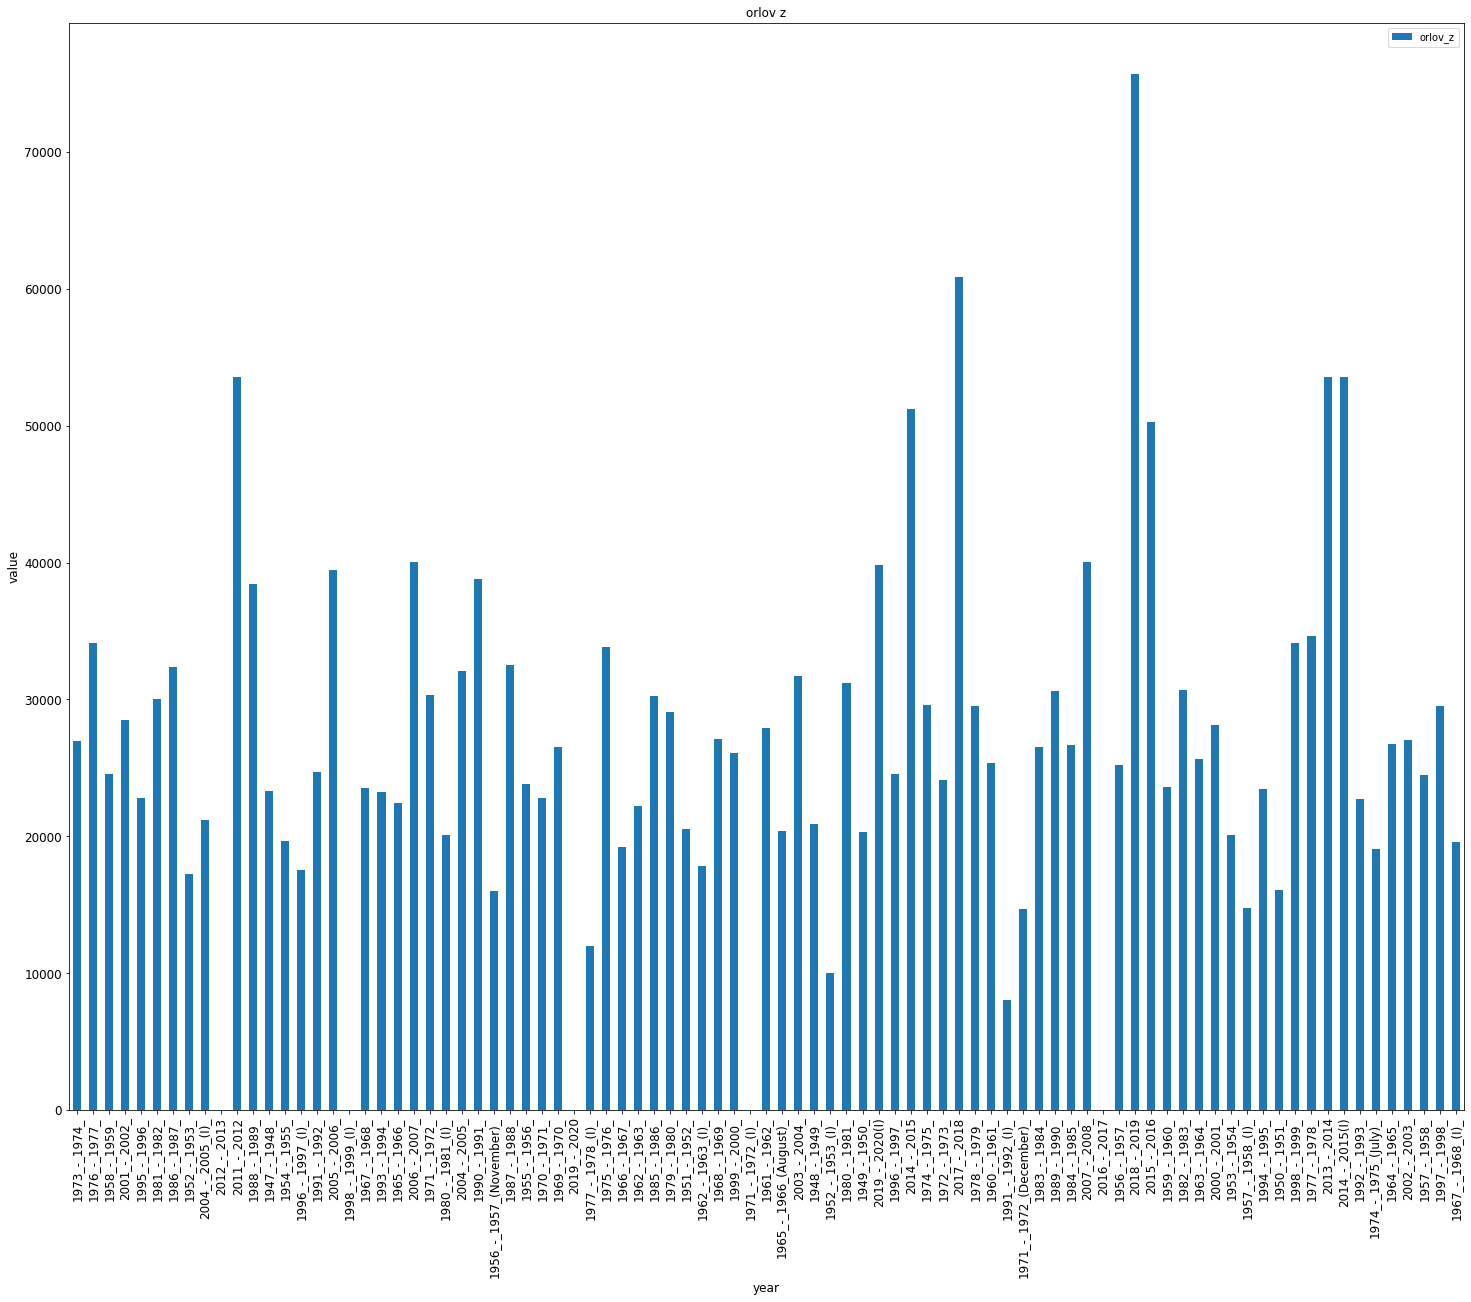

In [12]:
ax = new_df.plot(x='year', y='orlov_z', kind='bar', title ="orlov z", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()